2024-03-19 13:19:30.501544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
244/244 [==============================] - 37s 143ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 2/10
244/244 [==============================] - 34s 139ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 3/10
244/244 [==============================] - 34s 138ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 4/10
244/244 [==============================] - 34s 138ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 5/10
244/244 [==============================] - 35s 143ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 6/10
244/244 [==============================] - 34s 140ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 7/10
244/244 [==============================] - 34s 139ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 8/10
244/244 [==============================] - 35s 143ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 9/10
244/244 [==============================] - 35s 142ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 10/10
244/244 [==============================] - 35s 144ms/step - l

/Users/anhbarebear/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


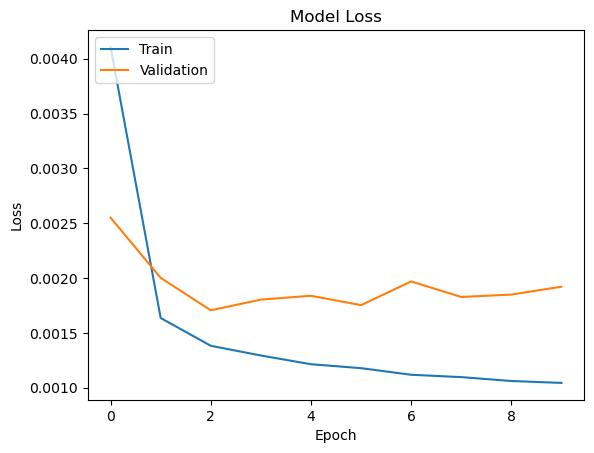

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'BTC-USD_hourly.csv'
df = pd.read_csv(file_path)

# Convert 'Datetime' to datetime format and sort
df['Date'] = pd.to_datetime(df['Datetime'])
df.sort_values('Date', inplace=True)

# Extract datetime features
df['hour'] = df['Date'].dt.hour
df['dayofweek'] = df['Date'].dt.dayofweek
df['dayofmonth'] = df['Date'].dt.day
features = ['Open', 'High', 'Low', 'Volume', 'hour', 'dayofweek', 'dayofmonth', 'Close']
target = 'Close'
df = df[features]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Function to create sequences
def create_sequences(data, sample_count, prediction_count, prediction_length):
    x, y = [], []
    for i in range(len(data) - sample_count - prediction_count * prediction_length):
        x.append(data[i:(i + sample_count)])
        y_seq = data[(i + sample_count):(i + sample_count + prediction_count * prediction_length):prediction_length, -1]  # Assuming 'Close' is the last column
        y.append(y_seq)
    return np.array(x), np.array(y)

# Adjust parameters for lighter processing
sample_count = 50  # Number of timesteps per sample
prediction_count = 10  # Number of future steps to predict
prediction_length = 10  # Interval between each prediction

x_train, y_train = create_sequences(scaled_data, sample_count, prediction_count, prediction_length)

# Define a simpler LSTM model
model = Sequential([
    LSTM(256, input_shape=(x_train.shape[1], x_train.shape[2])),  # Reduced neurons
    Dropout(0.2),  # Simplified model with one LSTM layer
    Dense(prediction_count)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Adjusted training parameters
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

# Save the model
model.save('BTC_prediction_model_light.h5')